#### DATA CLEANING AND REPROCESSING SECTION

In [67]:
#importing libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#loading data
df = pd.read_csv('property_data.csv')
df.head()


,BedRooms,Bath rooms,Size_sqft,location,year built,Garage Available,Furnishing,House Condition,Has_Pool,Lot Size,Price($)
0,3.0,1.0,1149,Rural,2004,NaN,Unfurnished,new,0.0,0.15,244043
1,NaN,2.0,1169,Rural,1989,1.0,NaN,Old,0.0,0.23,211250
2,4.0,3.0,1409,Suburban,1993,1.0,Unfurnished,gd,0.0,0.19,257239
3,3.0,3.0,1647,Suburban,2021,0.0,NaN,new,0.0,0.27,310316
4,2.0,3.0,1865,Urban,2009,0.0,furnised,old,1.0,0.39,334791


In [9]:
# Standardize column names
df.columns = (
    df.columns
    .str.strip()             
    .str.lower()            
    .str.replace(" ", "_")   
    .str.replace("-", "_")   
)


In [14]:
import re

def clean_column(col):
    col = col.lower().strip()
    col = re.sub(r'[\s\-]+', '_', col)
    col = re.sub(r'[^a-z0-9_]', '', col)
    col = col.strip('_')
    return col

df.columns = [clean_column(c) for c in df.columns]


In [15]:

# checking for missing values and printing out the percentages

missing = df.isnull().sum()
percentage_missing =round((missing/len(df)) * 100,2)
data_dict = {"missing_values_counts":missing,
             "missing values percentage":percentage_missing}

missing_df = pd.DataFrame(data_dict)
missing_df                   

,missing_values_counts,missing values percentage
bedrooms,46,4.6
bath_rooms,59,5.9
size_sqft,0,0.0
location,0,0.0
year_built,0,0.0
garage_available,104,10.4
furnishing,157,15.7
house_condition,0,0.0
has_pool,55,5.5
lot_size,0,0.0


In [18]:

#filling missing values with median
Missing_columns=['bedrooms','bath_rooms']
for col in Missing_columns:
    df[col] = df[col].fillna(df[col].median())
    print(f"Fill the missing values for: {col}")
    print("*"*100)
df.isnull().sum()

Fill the missing values for: bedrooms
****************************************************************************************************
Fill the missing values for: bath_rooms
****************************************************************************************************


bedrooms              0
bath_rooms            0
size_sqft             0
location              0
year_built            0
garage_available    104
furnishing          157
house_condition       0
has_pool             55
lot_size              0
price                 0
dtype: int64

In [20]:
#using mode to fill in binary columns
df["garage_available"].fillna(df["garage_available"].mode()[0])
df["has_pool"].fillna(df["has_pool"].mode()[0])


0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
995    0.0
996    1.0
997    1.0
998    0.0
999    0.0
Name: has_pool, Length: 1000, dtype: float64

In [ ]:
#using mode for categorical columns
df["furnishing"].fillna(df["furnishing"].mode()[0], inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6856\1247720383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["furnishing"].fillna(df["furnishing"].mode()[0], inplace=True)


In [24]:
print(df.isnull().sum())


bedrooms            0
bath_rooms          0
size_sqft           0
location            0
year_built          0
garage_available    0
furnishing          0
house_condition     0
has_pool            0
lot_size            0
price               0
dtype: int64


In [26]:
#Identify inconsistent values in categorical columns (like Location or Furnishing) and standardize them
# Check unique values in categorical columns
print(df["location"].unique())
print(df["furnishing"].unique())
print(df["house_condition"].unique())



['Rural' 'Suburban' 'Urban' 'ruraal' 'sub-urban' 'urbn']
['Unfurnished' 'Semi-Furnished' 'furnised' 'Semi furnished' 'Furnished']
['new' 'Old' 'gd' 'old' 'New' 'Good']


In [27]:
#standardize values
# Location standardization
df["location"] = df["location"].str.lower().str.strip()
df["location"] = df["location"].replace({
    "ruraal": "rural",
    "sub-urban": "suburban",
    "urbn": "urban"
})

# Furnishing standardization
df["furnishing"] = df["furnishing"].str.lower().str.strip()
df["furnishing"] = df["furnishing"].replace({
    "furnised": "furnished",
    "semi furnished": "semi-furnished"
})

# House condition standardization
df["house_condition"] = df["house_condition"].str.lower().str.strip()
df["house_condition"] = df["house_condition"].replace({
    "gd": "good"
})


In [28]:
df.head()

,bedrooms,bath_rooms,size_sqft,location,year_built,garage_available,furnishing,house_condition,has_pool,lot_size,price
0,3.0,1.0,1149,rural,2004,1.0,unfurnished,new,0.0,0.15,244043
1,3.0,2.0,1169,rural,1989,1.0,semi-furnished,old,0.0,0.23,211250
2,4.0,3.0,1409,suburban,1993,1.0,unfurnished,good,0.0,0.19,257239
3,3.0,3.0,1647,suburban,2021,0.0,semi-furnished,new,0.0,0.27,310316
4,2.0,3.0,1865,urban,2009,0.0,furnished,old,1.0,0.39,334791


In [29]:
# Ensure all numeric values (e.g., Year Built, Size) are of the correct data type

print(df.dtypes)

bedrooms            float64
bath_rooms          float64
size_sqft             int64
location             object
year_built            int64
garage_available    float64
furnishing           object
house_condition      object
has_pool            float64
lot_size            float64
price                 int64
dtype: object


In [ ]:
#drop duplicates in the dataset
df = df.drop_duplicates()
df.shape

(1000, 12)

In [38]:
#Save your cleaned dataset as a new CSV file called cleaned_property.csv
df.to_csv("cleaned_property.csv", index=False)

#### VISUALIZATIONS

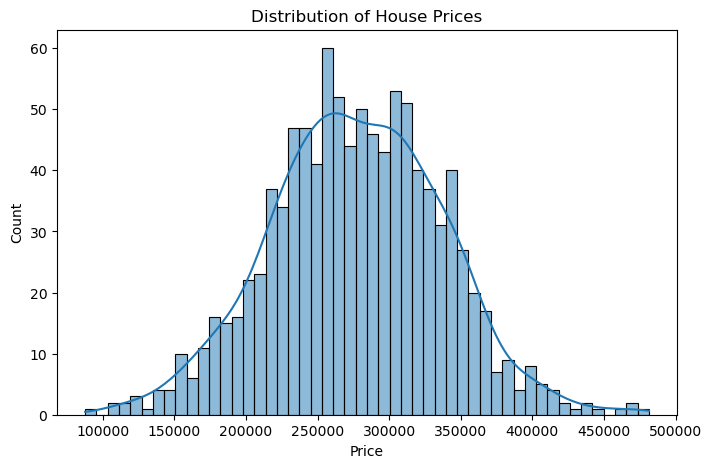

In [69]:
#Distribution of House Prices

plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

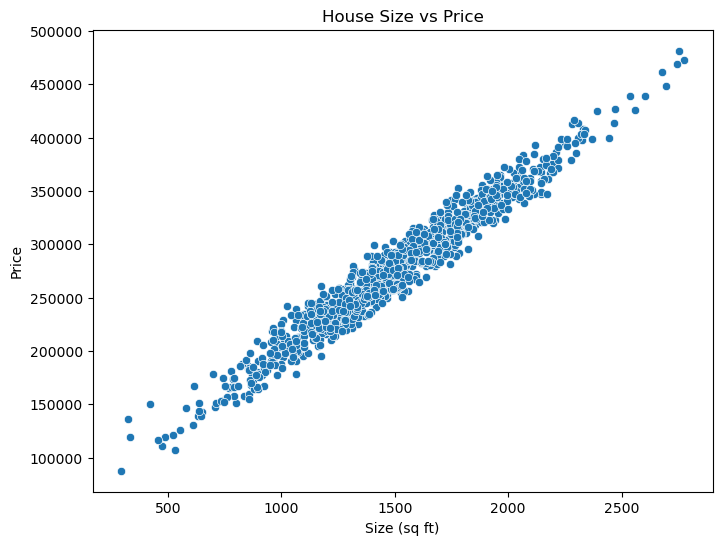

In [72]:
#Price vs Size (Scatter Plot)

plt.figure(figsize=(8,6))
sns.scatterplot(x="size_sqft", y="price", data=df)
plt.title("House Size vs Price")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price")
plt.show()


#### FEATURE ENGINEERING AND MODELLING

In [ ]:
#Derive any useful new columns (e.g., the age of the house from the year built).

df['house_age'] =2025 -df['year_built']
df.head()

,bedrooms,bath_rooms,size_sqft,location,year_built,garage_available,furnishing,house_condition,has_pool,lot_size,price,house_age
0,3.0,1.0,1149,rural,2004,1.0,unfurnished,new,0.0,0.15,244043,21
1,3.0,2.0,1169,rural,1989,1.0,semi-furnished,old,0.0,0.23,211250,36
2,4.0,3.0,1409,suburban,1993,1.0,unfurnished,good,0.0,0.19,257239,32
3,3.0,3.0,1647,suburban,2021,0.0,semi-furnished,new,0.0,0.27,310316,4
4,2.0,3.0,1865,urban,2009,0.0,furnished,old,1.0,0.39,334791,16


In [52]:
#Prepare categorical features for use in a machine learning model by converting them into numerical form.

le = LabelEncoder()
df["house_condition"] = le.fit_transform(df["house_condition"])


In [ ]:
#separate the features and the target
X = df.drop("price", axis=1) 
y = df["price"]


In [64]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
#Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [66]:
#Build and train a model to predict the price of a house
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Evaluate the performance of your model using appropriate metrics.
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.9668151039153282
MSE: 124302988.3396746


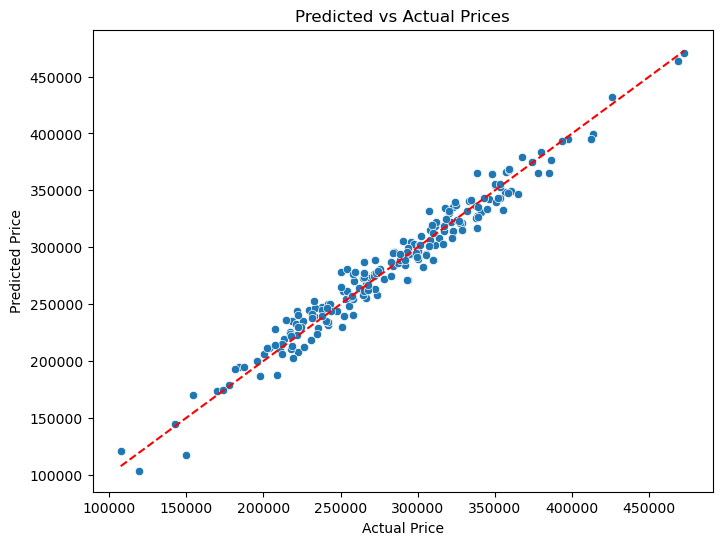

In [75]:
#Predicted vs Actual Prices (Model Evaluation)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.title("Predicted vs Actual Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()
